# Credit Risk Evaluator

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [2]:
# Import the data

lending_data_df = pd.read_csv("Resources/lending_data.csv")

lending_data_df

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

# My honest reason for believing the Random Classifier model will be better because I learned what linear regression was a long time ago. I'm guessing the latter of these two is more sophisticated. 

*Replace the text in this markdown cell with your predictions, and be sure to provide justification for your guess.*

## Split the Data into Training and Testing Sets

In [3]:
# Split the data into X_train, X_test, y_train, y_test

# small y = loan status

# big x = everything else

X = lending_data_df.drop(columns=["loan_status"])
y = lending_data_df["loan_status"]
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.head()


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
17459,10800.0,7.709,53100,0.435028,5,1,23100
25573,8600.0,6.797,44600,0.327354,3,0,14600
59701,9800.0,7.298,49300,0.391481,4,0,19300
30515,9600.0,7.224,48600,0.382716,4,0,18600
2892,10400.0,7.547,51600,0.418605,4,1,21600


## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like. 

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

In [4]:
# Train a Logistic Regression model and print the model score

from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression(solver = 'lbfgs', random_state = 1)
lrm.fit(X_train, y_train)
lrm.score(X_test, y_test)

0.9915394139496492

In [5]:
# Train a Random Forest Classifier model and print the model score

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test) 

0.9917457697069748

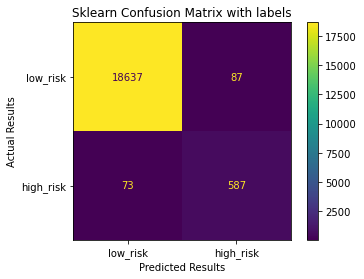

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rfc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['low_risk', 'high_risk'])
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Sklearn Confusion Matrix with labels', 
                xlabel='Predicted Results', 
                ylabel='Actual Results')
plt.show()

*Which model performed better? How does that compare to your prediction? Replace the text in this markdown cell with your answers to these questions.*

# The Random Classifier model performed better... Maybe because of the reason I guessed? It's more sophisticated? 